# EDA on the Udemy Courses Data Through Pandas, SQL and Tableau




This Dataset was taken from kaggle https://www.kaggle.com/andrewmvd/udemy-courses

This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy. Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.With an aim to dive deep into Data Analysis i created this project Using Python, Pandas, SQL and Tableau and develop insights by asking these few Questions:

# Questions.

1. What is the most popular course in terms of number of subscribers and number of reviews? 
2. What are the most popular subjects?
3. What are the top Free and Paid Courses?
4. Is there any relation between the length of the Course and Price?


These are just few Questions which came to my mind along with these Questions we'll try to do a in-depth Analysis of the Project. Let's Start

In [1]:
#Importing data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Other Visualization packages
import seaborn as sns 
sns.set_style("dark")

#Other Packages
import re
from wordcloud import WordCloud, STOPWORDS 
import warnings
warnings.filterwarnings("ignore")

import pandasql as psql
sql=psql.sqldf
!pip install pywaffle
from pywaffle import Waffle
sns.set_palette("pastel")


In [2]:
#importing udemy data 
df = pd.read_csv('udemy_courses.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Lets Check the Data for Null values

In [5]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Great, there isn't any missing data at all

In [6]:
#Dropping Columns Course_ID and URL,Since they are not required for EDA
df = df.drop(columns = ['course_id','url'], axis = 1)

In [7]:
#Lets Find the course with highest number of subscribers
df.loc[df.num_subscribers.idxmax()]['course_title']

'Learn HTML5 Programming From Scratch'

In [8]:
#Lets see which course has highest number of reviews
df.loc[df.num_reviews.idxmax()]['course_title']

'The Web Developer Bootcamp'

**Insights**
* The most subscribed course is a course for learning HTML5. I guess that makes sense since the hype of learning HTML is much more.  
* Most reviewed  course is Web Dev Bootcamp. 

### Do paid courses get more reviews than free courses? 

In [9]:
df.groupby(['is_paid']).mean()

,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,
False,0.00000,11533.951613,425.929032,21.416129,2.210753
True,72.12886,2429.808492,131.437945,41.829276,4.267904


There must be more Reviews on Paid Courses as per my Analogy but maybe It doesn't matter if the course is paid or not

### What are the more popular subjects?

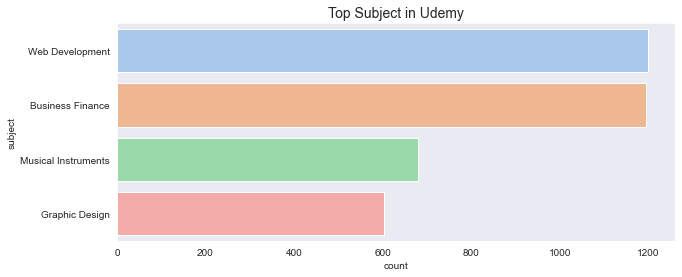

In [10]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.subject, data = df, order = df.subject.value_counts().index)
plt.title("Top Subject in Udemy", fontsize = 14)
plt.show()

Sadly! this Data Set has just four subjects. Also obviously Web Development is at the top since only people who spend more time on web use Udemy.

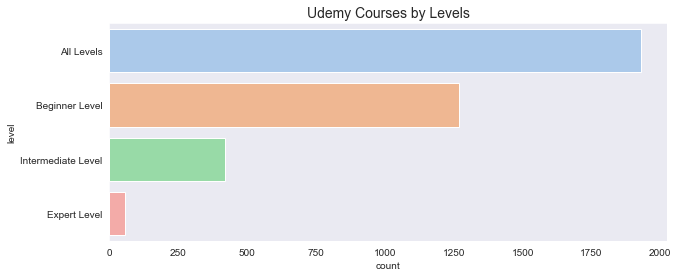

In [11]:
plt.figure(figsize = (10,4))
sns.countplot(y = df.level, data = df, order = df.level.value_counts().index)
plt.title("Udemy Courses by Levels", fontsize = 14)
plt.show()

So Mostly the courses are start to end covering all Levels


# Does price effect the buyer? 


In [12]:
df['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [13]:
#Converting column to integer
df.price = pd.to_numeric(df['price'])

<Figure size 432x288 with 0 Axes>

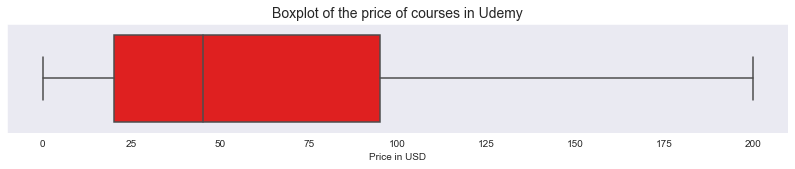

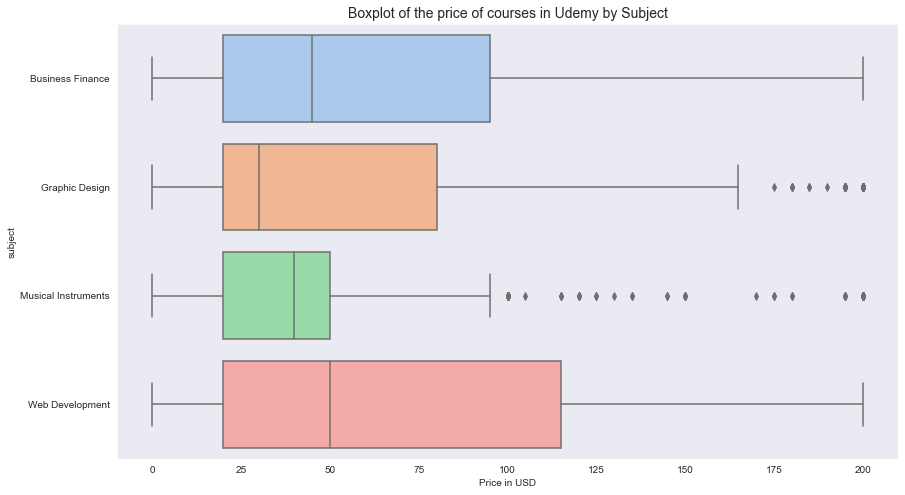

In [14]:
plt.figure()
plt.subplots(figsize = (14,2))
sns.boxplot(x = df.price, data = df, color = 'red')
plt.title('Boxplot of the price of courses in Udemy',fontsize = 14)
plt.xlabel('Price in USD') #I am assuming all prices are in USD

plt.subplots(figsize = (14,8))
sns.boxplot(x = df.price, y = df.subject, data = df)
plt.title('Boxplot of the price of courses in Udemy by Subject',fontsize = 14)
plt.xlabel('Price in USD') #I am assuming all prices are in USD
plt.show()

**Insights:** 
* Average price of a course is just under $50 USD
* Graphic Design courses has the lowest average prices
* Web Development courses has the largest interquartile range in price.
* Music courses have the lowest interquatile range in price. 

### In which year were the most courses Published?

In [15]:
#Extracting year from date time. 
df['year'] = pd.to_datetime(df.published_timestamp).dt.year

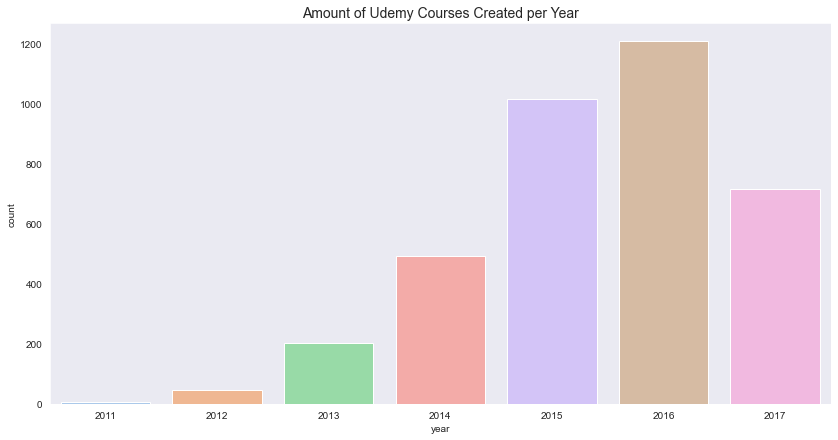

In [16]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df)
plt.title("Amount of Udemy Courses Created per Year", fontsize = 14)
plt.show()

* Looks like many more courses are being released each year, and the dip is 2017 is maybe because the data would have been collected in mid 2017.

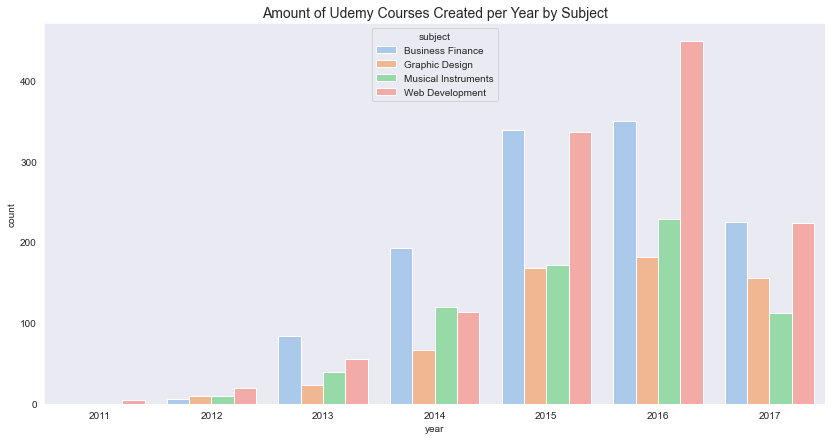

In [17]:
plt.figure(figsize = (14,7))
sns.countplot(x = df.year, data = df, hue = df.subject)
plt.title("Amount of Udemy Courses Created per Year by Subject", fontsize = 14)
plt.show()

* Clearly with time more Tech Courses are being Created

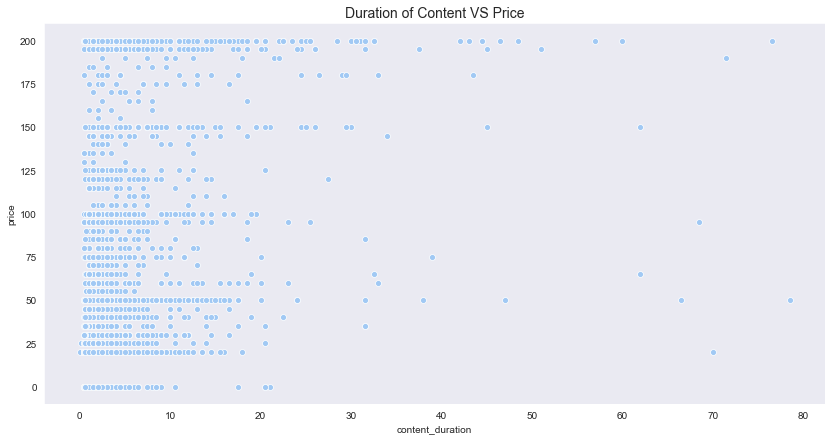

In [18]:
#Let's Know if there is any relation between price and length of content
plt.figure(figsize = (14,7))
sns.scatterplot(x = df.content_duration, y =df.price, data = df)
plt.title("Duration of Content VS Price", fontsize = 14)
plt.show()

Mostly the Cost of High Duration courses is higher

# DATA ANALYSIS THROUGH SQL

After using Pandas Let's Use SQL to gain More Insights

In [19]:
#lets Look at the most subscribed Course
Top_courses=sql('''select course_title, max(num_subscribers) from df''')
Top_courses

,course_title,max(num_subscribers)
0,Learn HTML5 Programming From Scratch,268923


In [20]:
#lets Look at the most lenghty Course
Top_Duration=sql('''select course_title, max(content_duration) from df''')
Top_Duration

,course_title,max(content_duration)
0,The Complete Figure Drawing Course HD,78.5


In [21]:
#lets Look at the top Course in Business Finance Courses
Top_Business_Finance=sql('''select course_title, max(num_subscribers) from df where subject="Business Finance"''')
Top_Business_Finance

,course_title,max(num_subscribers)
0,Bitcoin or How I Learned to Stop Worrying and ...,65576


In [22]:
#lets Look at the top Course in Musical Instruments Courses
Top_Musical=sql('''select course_title, max(num_subscribers) from df where subject="Musical Instruments"''')
Top_Musical

,course_title,max(num_subscribers)
0,Free Beginner Electric Guitar Lessons,101154


In [23]:
#lets Look at the top 10 Free Courses
Top_free_courses=sql('''select course_title, num_subscribers from df where is_paid=0 order by num_subscribers desc limit 10''')
Top_free_courses

,course_title,num_subscribers
0,Learn HTML5 Programming From Scratch,268923
1,Coding for Entrepreneurs Basic,161029
2,Build Your First Website in 1 Week with HTML5 ...,120291
3,Free Beginner Electric Guitar Lessons,101154
4,Web Design for Web Developers: Build Beautiful...,98867
5,Practical PHP: Master the Basics and Code Dyna...,83737
6,Beginner Photoshop to HTML5 and CSS3,73110
7,Web Development By Doing: HTML / CSS From Scratch,72932
8,HTML and CSS for Beginners - Build a Website &...,70773
9,Bitcoin or How I Learned to Stop Worrying and ...,65576


In [24]:
#lets Look at the top 10 Paid Courses
Top_Paid_courses=sql('''select course_title, num_subscribers from df where is_paid=1 order by num_subscribers desc limit 10''')
Top_Paid_courses

,course_title,num_subscribers
0,The Web Developer Bootcamp,121584
1,The Complete Web Developer Course 2.0,114512
2,Learn Javascript & JQuery From Scratch,84897
3,JavaScript: Understanding the Weird Parts,79612
4,Pianoforall - Incredible New Way To Learn Pian...,75499
5,Angular 4 (formerly Angular 2) - The Complete ...,73783
6,Become a Web Developer from Scratch,69186
7,Learn and Understand AngularJS,59361
8,Learn and Understand NodeJS,58208
9,The Complete HTML & CSS Course - From Novice T...,57422


In [25]:
#lets Look at the top Free Courses In Each Level
courses_level=sql('''select course_title, level, max(num_subscribers) as subscribers from df where is_paid=0 group by level order by 3 desc''')
courses_level

,course_title,level,subscribers
0,Learn HTML5 Programming From Scratch,All Levels,268923
1,Coding for Entrepreneurs Basic,Beginner Level,161029
2,Introduction to Financial Modeling,Intermediate Level,29167


In [26]:
#lets Look at the top Paid Courses In Each Level
Topaidcourses=sql('''select course_title, level, max(num_subscribers) as subscribers from df where is_paid=1 group by level order by 3 desc''')
Topaidcourses

,course_title,level,subscribers
0,The Web Developer Bootcamp,All Levels,121584
1,Build Websites from Scratch with HTML & CSS,Beginner Level,51257
2,Master the MEAN Stack - Learn By Example,Intermediate Level,25799
3,Options Trading 3 : Advanced Stock Profit and ...,Expert Level,5172


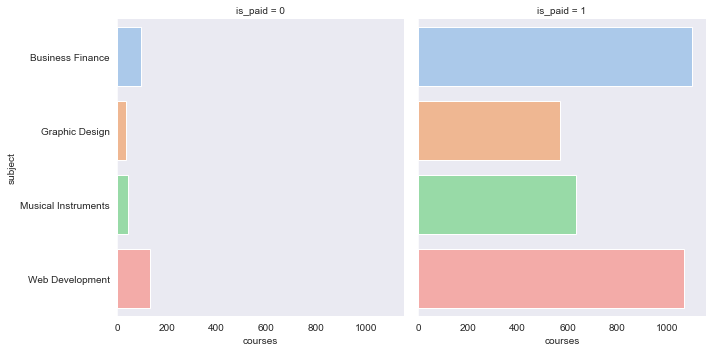

In [27]:
# Lets PLot Courses By topic
courses_by_topic=sql('''select subject, count(course_title) as courses, is_paid
                     from df
                     group by subject, is_paid''')
sns.catplot(y='subject',x='courses',col='is_paid',kind='bar',data=courses_by_topic)


<Figure size 864x432 with 0 Axes>

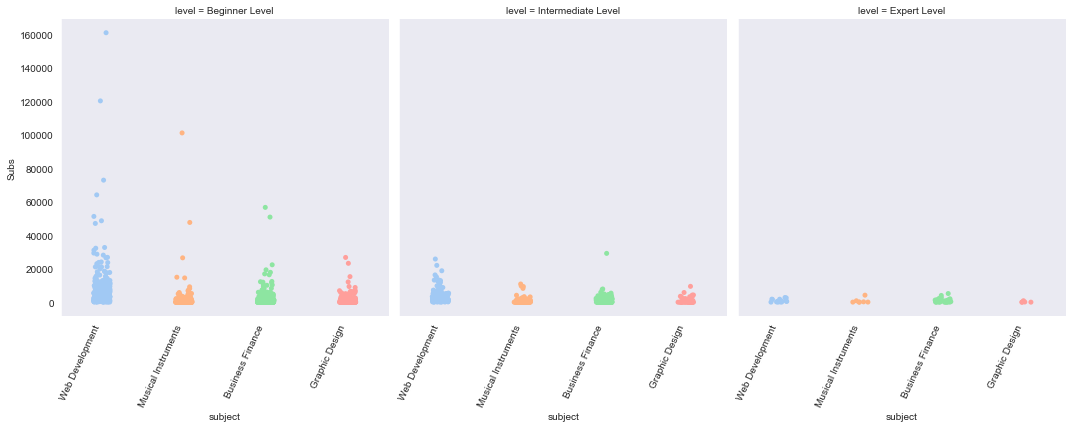

In [28]:
#Let's see the number of subjects by level
popular_course_level=sql('''select course_title,subject,level, sum(num_subscribers) as Subs from df 
                                                                where level not like ('%All%') 
                                                                group by course_title, subject,level 
                                                                order by Subs desc''')
plt.figure(figsize=(12,6))
g=sns.catplot(x='subject',y='Subs',col='level',data=popular_course_level)
g.set_xticklabels(rotation=65, horizontalalignment='right')


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 864x432 with 0 Axes>

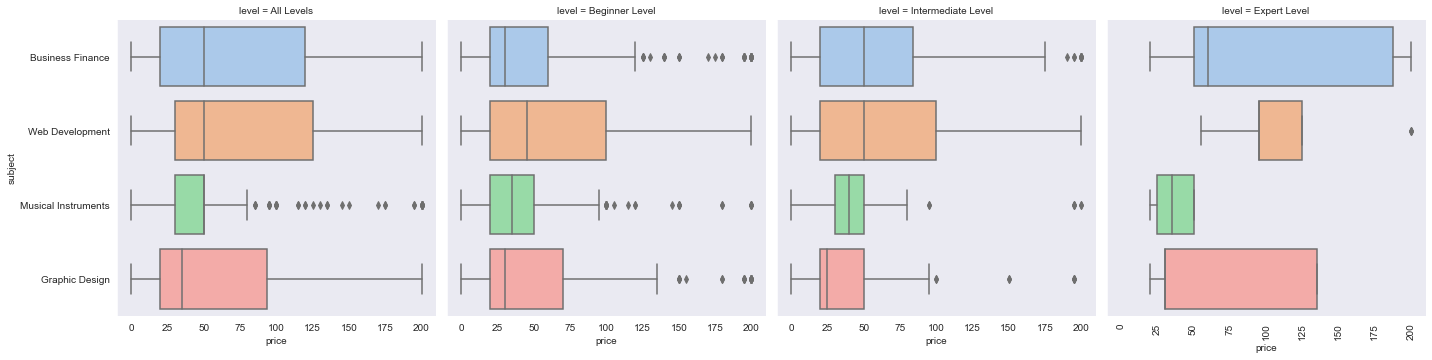

In [29]:
#Are Beginner level Courses Cheaper?

beginner=sql('''select course_title, subject,level,price 
             from df
         
             group by course_title,subject,level 
             order by price desc''')
             
plt.figure(figsize=(12,6))
sns.catplot(x='price',y='subject',col='level',kind='box',data=beginner)
plt.xticks(rotation=90)

Text(0.5, 0, 'Content Duration in Hours')

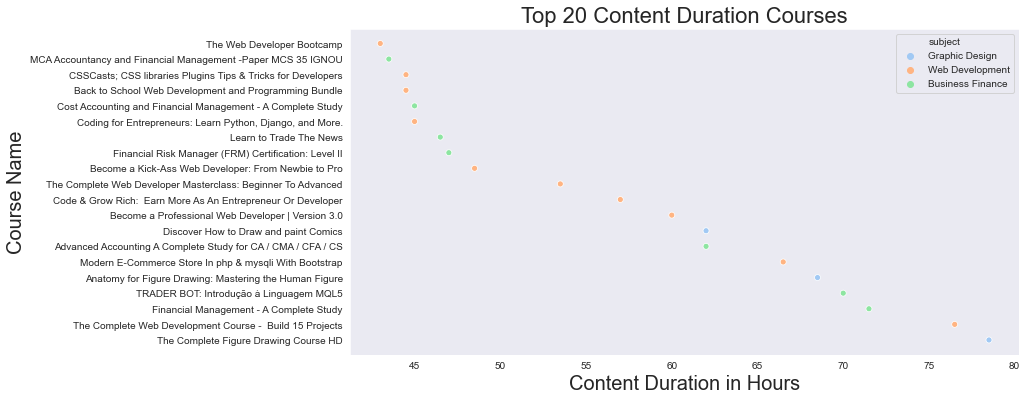

In [30]:
#Lets plot the Top 20 Lenghty Courses
contenttop20=sql('''select course_title,subject, sum(content_duration) as content_duration from 
                    df group by course_title, 
                    subject 
                    order by content_duration desc limit 20''')
plt.figure(figsize=(12,6))
sns.scatterplot(x='content_duration',y='course_title',hue='subject',data=contenttop20)
plt.title("Top 20 Content Duration Courses", fontsize = 22)
plt.ylabel('Course Name', fontsize = 20)
plt.xlabel('Content Duration in Hours', fontsize = 20)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

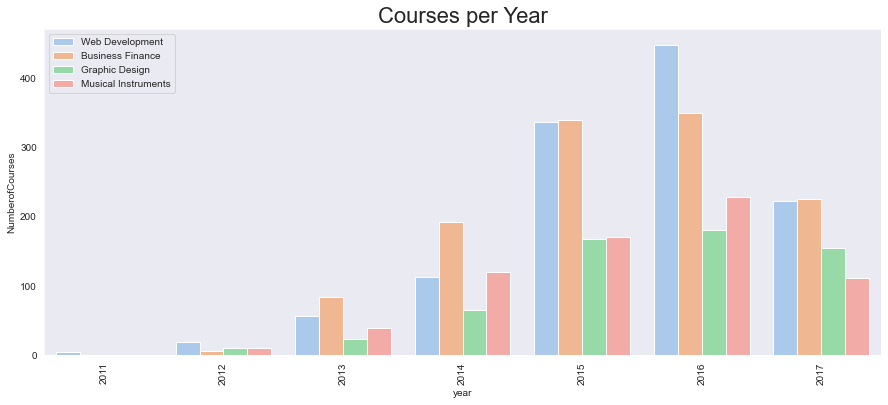

In [31]:
#Let's try to extract something from Date.

#Let's Check the Courses Published Per Year

per_year=sql('''select year,subject, sum(count(course_title)) over (partition by year, subject) as NumberofCourses 
             from df 
             group by year,subject
             order by year''')

plt.figure(figsize=(15,6))
g2=sns.barplot(x='year',y='NumberofCourses',data=per_year,hue='subject')
plt.title('Courses per Year',fontsize=22)    
plt.legend(loc='upper left')      
plt.xticks(rotation=90)

### Now Let's Build a Wordcloud out of our Data to have a wider Look at the courses

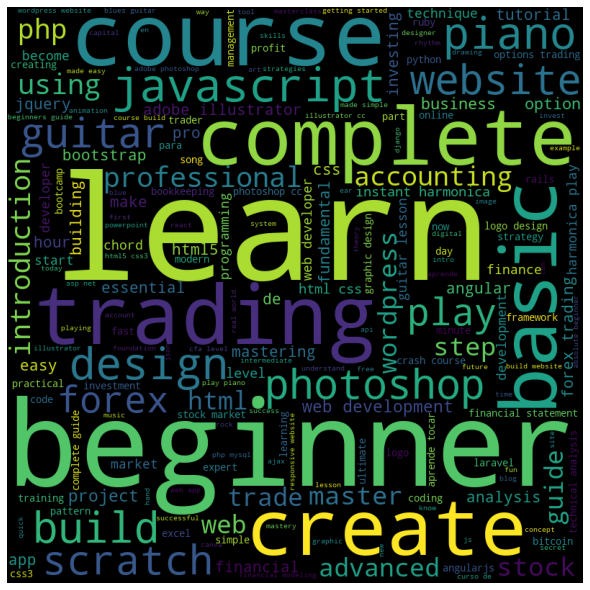

In [32]:

comment_words = ''
stopwords = set(STOPWORDS)

for s in df.course_title:
    s = str(s)
    tokens = s.split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Finally Let's do the Anlysis on TABLEAU

Tableau Viz - https://public.tableau.com/profile/bhuvnesh.sharma4935#!/vizhome/UdemyCoursesAnalysis/Dashboard1




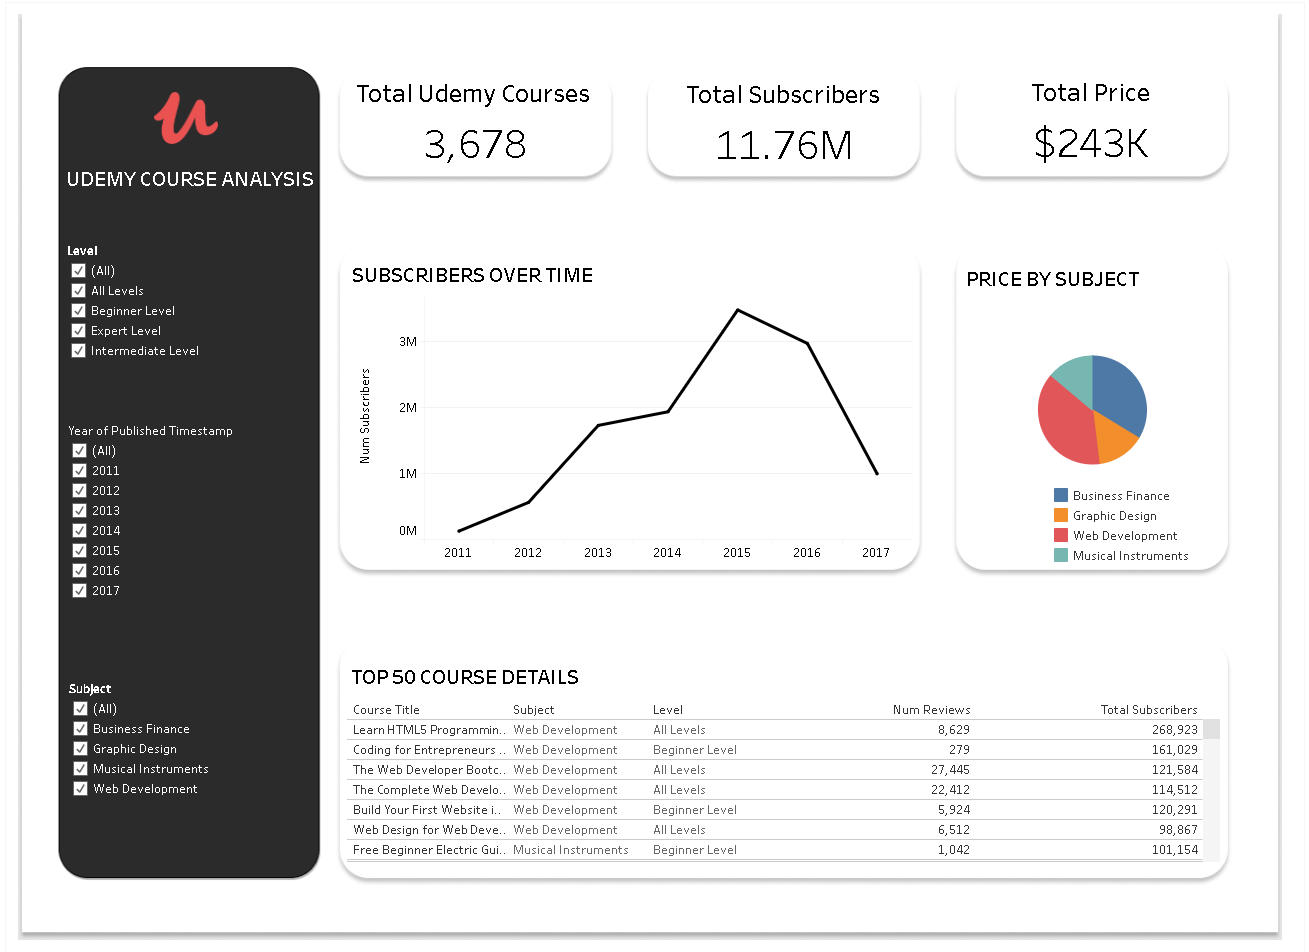

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "Udemy_Courses.png", width=1000, height=500)

Clearly Most of our Questions Has been Answered. Altough the dataset was small it had unique information. I enjoyed Doing the Project. Thank You 